In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

## 1. Simple EDA and Baseline Model

In [106]:
# Load the cleaned complete data
all_df = pd.read_pickle('../dump/complete_data_cleaned_test')

In [107]:
# all_df.head()

In [108]:
# convert unit of 'opening_weekend_usa' to million dollors
all_df['opening_weekend_usa'] = all_df['opening_weekend_usa']/1e6

In [109]:
all_df.describe()

,rating,budget,opening_weekend_usa,gross_usa,gross_world,runtime,rating_value_b,rating_count_b,review_count_b,page,...,author_search,search_fiction_author,book_popularity,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity
count,1135.000000,8.300000e+02,713.000000,1.135000e+03,8.420000e+02,1124.000000,1135.000000,1.135000e+03,1135.000000,1106.000000,...,8.810000e+02,8.810000e+02,872.000000,881.000000,881.000000,881.000000,880.000000,880.000000,881.000000,881.000000
mean,6.667313,2.846106e+07,9.598797,3.740295e+07,7.753742e+07,113.920819,3.875551,2.312974e+05,7510.383260,332.676311,...,2.068350e+07,1.636476e+08,0.086892,0.124288,8.561603,10.932581,0.122211,-4.003152,0.124289,-4.736478
std,0.905118,3.429356e+07,16.664456,4.785715e+07,1.450034e+08,23.305856,0.393255,5.965459e+05,16791.442166,171.545723,...,1.140401e+08,2.688862e+08,0.220079,0.436333,3.326120,3.810858,0.921601,1.942105,0.436334,2.619676
min,3.000000,3.000000e+04,0.000181,5.250000e+02,7.600000e+01,55.000000,0.000000,0.000000e+00,0.000000,0.000000,...,3.900000e+01,1.160000e+03,0.000000,0.000000,1.945910,3.663562,0.000012,-11.346477,0.000006,-11.959746
25%,6.100000,5.025000e+06,0.229292,1.096977e+07,5.916931e+06,99.000000,3.760000,2.808500e+03,218.500000,224.000000,...,3.100000e+03,1.330000e+05,0.010000,0.001200,6.021023,8.039157,0.005467,-5.209122,0.001168,-6.752070
50%,6.700000,1.800000e+07,4.163623,3.011468e+07,2.450694e+07,110.000000,3.920000,2.513900e+04,1314.000000,308.000000,...,2.430000e+04,1.720000e+07,0.020000,0.009200,7.859413,10.098232,0.017820,-4.027413,0.009167,-4.692182
75%,7.350000,3.575000e+07,11.515790,3.534301e+07,8.420588e+07,125.000000,4.070000,1.691815e+05,5807.000000,401.000000,...,6.210000e+05,1.690000e+08,0.060000,0.059600,10.561008,13.339086,0.068059,-2.687405,0.059615,-2.819842
max,9.200000,2.500000e+08,152.535747,4.080107e+08,1.033927e+09,280.000000,4.700000,7.292896e+06,173808.000000,1463.000000,...,1.860000e+09,1.220000e+09,2.420000,6.589700,18.403535,21.343842,26.369863,3.272222,6.589744,1.885514


In [110]:
# all_df.country

In [111]:
all_df['release_year'] = all_df['release_date'].dt.year
all_df['years_apart'] = all_df['release_year']-all_df['publish_year']

In [112]:
all_df.rename(columns={'certificate':'MPAA'},inplace=True)
all_df.drop_duplicates(subset=['movie_title','release_year'],inplace=True)

In [113]:
# Find top 100 actors
all_df_actor = all_df['actor'].str.join(sep='*').str.get_dummies(sep='*')
actor_list = (all_df_actor.sum()).sort_values(ascending=False).index.tolist()[:100]
# actor_list

In [114]:
# Remove outliers
all_df = all_df[all_df.opening_weekend_usa < 100]
all_df = all_df[all_df.movie_title != "Kiki's Delivery Service"]
# all_df = all_df[all_df.movie_title.isin(res_movie)]
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 1516
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   movie_title             708 non-null    object        
 1   rating                  708 non-null    float64       
 2   MPAA                    708 non-null    object        
 3   genre                   708 non-null    object        
 4   release_date            708 non-null    datetime64[ns]
 5   budget                  591 non-null    float64       
 6   opening_weekend_usa     708 non-null    float64       
 7   gross_usa               708 non-null    float64       
 8   gross_world             707 non-null    float64       
 9   runtime                 703 non-null    float64       
 10  director                708 non-null    object        
 11  writer                  708 non-null    object        
 12  actor                   708 non-null    object   

In [115]:
# all_df = all_df[all_df.movie_title.isin(res_movie) == False]

In [116]:
cat_feature = ['MPAA','genre','distributor','language','country']
# con_feature = ['budget','runtime','film_count_d','avg_rating_d','avg_gross_d','T_movie_age']
# con_book_feature = ['T_book_age','publish_year','page','log_book_popularity','log_author_popularity']
con_feature = ['budget','runtime','film_count_d','avg_rating_d','avg_gross_d','release_year']
con_book_feature = ['years_apart','publish_year','page','log_book_popularity','log_author_popularity','count_a']
target_candidate = ['opening_weekend_usa','log_owu','gross_usa','gross_world','rating']

potential_feature = ['rating_value_b','rating_count_b','review_count_b']

In [117]:
# Choose only the continuous variables for now

cc_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + cat_feature].copy()
c_movie_df = all_df[['opening_weekend_usa'] + con_feature].copy() # only continuous features for movie
c_all_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature].copy() # continuous features both movie and book

In [118]:
# c_df.describe()

In [119]:
# cc_df.info()

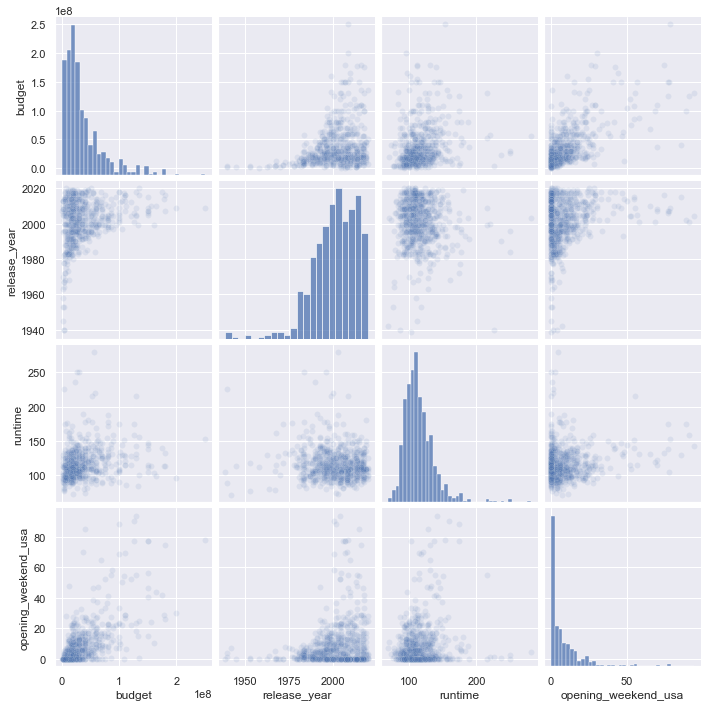

In [120]:
# sns.pairplot(c_movie_df[['opening_weekend_usa','budget','release_year','runtime']], plot_kws=dict(alpha=.1, edgecolor='none'))
sns.pairplot(c_movie_df[['budget','release_year','runtime','opening_weekend_usa']],plot_kws=dict(alpha=.1))

In [121]:
c_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   opening_weekend_usa  708 non-null    float64
 1   budget               591 non-null    float64
 2   runtime              703 non-null    float64
 3   film_count_d         708 non-null    int64  
 4   avg_rating_d         708 non-null    float64
 5   avg_gross_d          708 non-null    int64  
 6   release_year         708 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 44.2 KB


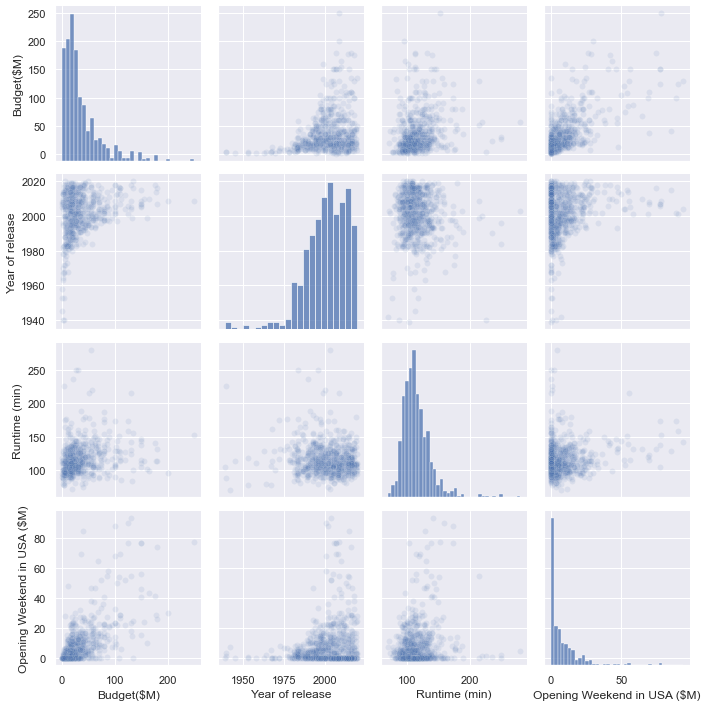

In [122]:
scatter_df = all_df[['budget','release_year','runtime','opening_weekend_usa']].copy()
scatter_df['budget'] = scatter_df['budget']/1e6
scatter_df.rename(columns={'budget': 'Budget($M)', 'release_year':'Year of release', 'runtime':'Runtime (min)',\
'opening_weekend_usa': 'Opening Weekend in USA ($M)'},inplace=True)
fig = sns.pairplot(scatter_df,plot_kws=dict(alpha=.1))
    
# for i in range(len(xlabels)):
#     for j in range(len(ylabels)):
#         g.axes[j,i].xaxis.set_label_text(xlabels[i])
#         g.axes[j,i].yaxis.set_label_text(ylabels[j])

# xlabels = ['budget(USD)','release year','runtime(min)','opening_weekend_usa ($M)']
# ylabels = ['budget(USD)','release year','runtime(min)','opening_weekend_usa ($M)']


# i=3
# for j in range(len(ylabels)):
#         g.axes[j,i].xaxis.set_label_text(xlabels[i])
#         g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()

In [123]:
fig.savefig('../plot/pairplot.pdf', bbox_inches='tight', transparent = True)

### Baseline Model
Only consider the continuous predictors and use 'opening_weekend_usa'.

In [124]:
# Separate features and target variable

def get_Xy(df):
    
    df = df.dropna()
    
    target = 'opening_weekend_usa'
#     target = 'rating'
#     target = 'gross_usa'
    all_column = df.columns.values.tolist()
    all_column.remove(target)

    y = df[target]
    X = df[all_column]
    
    return X, y

In [125]:
X, y = get_Xy(c_movie_df)

In [126]:
X, y = get_Xy(c_all_df)

In [127]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
#     # perform train/val split
#     X_train, X_val, y_train, y_val = \
#         train_test_split(X, y, test_size=0.2, random_state=25)

    # train/val/test split
    # holding test set
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Validation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
#     print(f'RMSE: {rmse:.2f}')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        
    
    # Visualization
    fig, ax = plt.subplots(1, 1)
    plt.scatter(y_val, y_pred, alpha=0.4)

    ax.set_xlabel('Opening weekend revenue (USD)',fontsize=20)
    ax.set_ylabel('Prediction (USD)',fontsize=20)
    ax.set_title('R$^2$: %0.2f' % val_score, fontsize=20)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

    x=np.linspace(0,0.7e2,50)
#     x=np.linspace(4,9,50)
    
    y=x
    plt.plot(x,y,color='firebrick',linewidth=3,alpha=0.6)
    plt.ylim(0,)
    plt.xlim(0,)
    return fig


Train R^2 score was: 0.48815902816186285
Validation R^2 score was: 0.42104360425138043
Feature coefficient results: 

budget : 0.00
runtime : 0.01
film_count_d : -0.10
avg_rating_d : -1.59
avg_gross_d : 0.00
release_year : 0.04
years_apart : 0.01
publish_year : 0.03
page : 0.00
log_book_popularity : 0.30
log_author_popularity : 0.35
count_a : 0.03


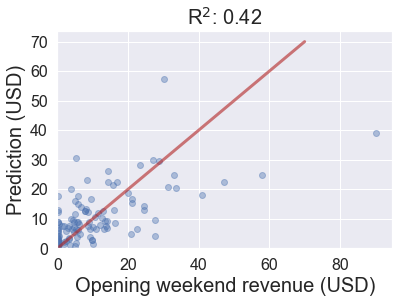

In [128]:
# Reports for model with all features
fig = split_and_validate(X,y)

In [129]:
fig.savefig('../plot/lr_prediction_m.pdf', bbox_inches='tight', transparent = True)


Train R^2 score was: 0.48815902816186285
Validation R^2 score was: 0.42104360425138043
Feature coefficient results: 

budget : 0.00
runtime : 0.01
film_count_d : -0.10
avg_rating_d : -1.59
avg_gross_d : 0.00
release_year : 0.04
years_apart : 0.01
publish_year : 0.03
page : 0.00
log_book_popularity : 0.30
log_author_popularity : 0.35
count_a : 0.03


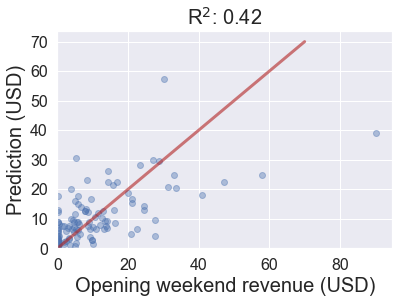

In [130]:
# Reports for model with all features
fig = split_and_validate(X,y)

In [131]:
fig.savefig('../plot/lr_prediction_b.pdf', bbox_inches='tight', transparent = True)

In [ ]:
# # Reports for model with features of movie only
# X, y = get_Xy(c_movie_df)
# split_and_validate(X,y)

In [100]:
def get_score(X_train,X_val,y_train,y_val):
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Validation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
#     print(f'RMSE: {rmse:.2f}')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        
    
    # Visualization
    fig, ax = plt.subplots(1, 1)
    plt.scatter(y_val, y_pred, alpha=0.4)

    ax.set_xlabel('Opening weekend revenue (USD)',fontsize=20)
    ax.set_ylabel('Prediction (USD)',fontsize=20)
    ax.set_title('R$^2$: %0.2f' % val_score, fontsize=20)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

    x=np.linspace(0,0.7e2,50)
#     x=np.linspace(4,9,50)
    
    y=x
    plt.plot(x,y,color='firebrick',linewidth=3,alpha=0.6)
    plt.ylim(0,)
    plt.xlim(0,)
    return fig

In [ ]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

In [ ]:
fig = get_score(X_train,X_val,y_train,y_val)

In [ ]:
fig.savefig('../plot/lr_prediction_.pdf', bbox_inches='tight', transparent = True)

### Cross-validation

In [ ]:
# Will not use X_test, y_test
lr = LinearRegression()

X, y = get_Xy(c_movie_df)

X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=21)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

In [ ]:
# result = cross_val_score(lr, X_train, y_train, # estimator, features, target
#                 cv=5, # number of folds 
#                 scoring='r2') # scoring metric

In [ ]:
# # mean of val_score
# print("Meam of validation score is:", np.mean(result))
# print(result)

In [ ]:
cross_val_score()

### Find outliers and evaluate the model again

In [84]:
c_all_df['rating_b'] = all_df['rating_value_b']

In [85]:
c_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   opening_weekend_usa    708 non-null    float64
 1   budget                 591 non-null    float64
 2   runtime                703 non-null    float64
 3   film_count_d           708 non-null    int64  
 4   avg_rating_d           708 non-null    float64
 5   avg_gross_d            708 non-null    int64  
 6   release_year           708 non-null    int64  
 7   years_apart            708 non-null    float64
 8   publish_year           708 non-null    float64
 9   page                   696 non-null    float64
 10  log_book_popularity    619 non-null    float64
 11  log_author_popularity  620 non-null    float64
 12  count_a                708 non-null    int64  
 13  rating_b               708 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 83.0 KB


## 2. Basic Feature Engineering

### Split the data set into Train / Validation / Test sets

In [86]:
# Choose df
# X, y = get_Xy(c_movie_df)
X, y = get_Xy(c_all_df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

### * Scaled Features

In [87]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [88]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train), lr.score(scaler.transform(X_val),y_val)

(0.49254929591667385, 0.43524181346432145)

In [89]:
lr.coef_

array([ 9.18263698e+00,  7.49504050e-03, -7.17272441e-01, -7.66139872e-01,
        1.58606481e+00,  6.83533422e-01, -1.31547014e-01,  3.72299237e-01,
        4.44113578e-01,  4.09554801e-01,  8.72686723e-01,  8.15679012e-01,
        1.05379010e+00])

In [93]:
coef = pd.DataFrame(list(zip((con_feature+con_book_feature+['rating']),lr.coef_)),\
                    index=con_feature+con_book_feature+['rating'],\
                    columns = ['Feature','Coefficient']).\
sort_values(['Coefficient'],ascending=False)
coef = coef[coef.Feature != 'T_book_age']
coef

,Feature,Coefficient
budget,budget,9.182637
avg_gross_d,avg_gross_d,1.586065
rating,rating,1.053790
log_author_popularity,log_author_popularity,0.872687
count_a,count_a,0.815679
release_year,release_year,0.683533
page,page,0.444114
log_book_popularity,log_book_popularity,0.409555
publish_year,publish_year,0.372299
runtime,runtime,0.007495


In [94]:
coef.index.tolist()

['budget',
 'avg_gross_d',
 'rating',
 'log_author_popularity',
 'count_a',
 'release_year',
 'page',
 'log_book_popularity',
 'publish_year',
 'runtime',
 'years_apart',
 'film_count_d',
 'avg_rating_d']

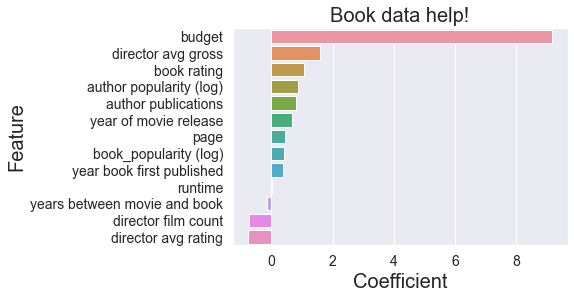

In [96]:
# Generate coef plots for the 3 continuous features
# plt.style.use('seaborn')
import matplotlib.style as style
sns.set()
# style.use('seaborn-poster') #sets the size of the charts
# style.use('seaborn-dark')
p = sns.color_palette("GnBu_r",3)
sns.set_palette(p)

fig, ax = plt.subplots()
sns.set_palette(p)
sns.barplot(y="Feature", x= 'Coefficient', data = coef,orient='h')
ax.set_title('Book data help!',fontsize=20)
ax.set_ylabel('Feature',fontsize=20)
ax.set_xlabel('Coefficient',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xticks([0,5e4,100e3,150e3,200e3,250e3])
ax.set_yticklabels(['budget',
 'director avg gross',
 'book rating',
 'author popularity (log)',
 'author publications',
 'year of movie release',
 'page',
 'book_popularity (log)',
 'year book first published',
 'runtime',
 'years between movie and book',
 'director film count',
 'director avg rating'])

fig.savefig('../plot/lr_coef_book.pdf', bbox_inches='tight', transparent=True)
# fig.savefig('Top_station2.svg', format='svg')

In [98]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
# X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

Meam of validation score is: 0.36060040882313243
[ 0.551631    0.46679908  0.34186366  0.4552971  -0.0125888 ]



Train R^2 score was: 0.49254929591667407
Validation R^2 score was: 0.4352418134643742
Feature coefficient results: 

budget : 0.00
runtime : 0.00
film_count_d : -0.10
avg_rating_d : -1.44
avg_gross_d : 0.00
release_year : 0.04
years_apart : 0.01
publish_year : 0.03
page : 0.00
log_book_popularity : 0.22
log_author_popularity : 0.32
count_a : 0.03
rating_b : 3.14


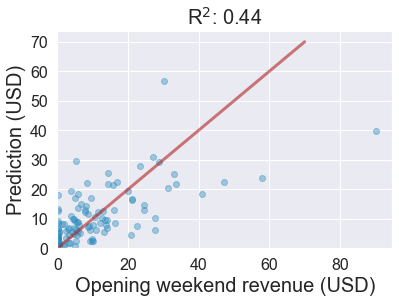

In [101]:
fig = get_score(X_train,X_val,y_train,y_val)

### * Polynomial Fearues
(degree=2): Adding interaction terms and second order feature.

In [ ]:
# Choose df
# X, y = get_Xy(c_movie_df)
X, y = get_Xy(c_all_df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

In [ ]:
# Only with interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only = True)

X_train_poly_scaled = scaler.fit_transform(poly.fit_transform(X_train))
X_val_poly_scaled = scaler.transform(poly.transform(X_val))

lr.fit(X_train_poly_scaled,y_train)
lr.score(X_train_poly_scaled,y_train), lr.score(X_val_poly_scaled,y_val)

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
# X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)
result = cross_val_score(lr, X_train_poly_scaled, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

In [ ]:
# increased train score, but decreased val score.
# overfitting

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only = False)

X_train_poly_scaled = scaler.fit_transform(poly.fit_transform(X_train))
X_val_poly_scaled = scaler.transform(poly.transform(X_val))

lr.fit(X_train_poly_scaled,y_train)
lr.score(X_train_poly_scaled,y_train), lr.score(X_val_poly_scaled,y_val)

In [ ]:
feature = poly.get_feature_names(con_feature)
list(zip((feature),lr.coef_))

In [ ]:
coef = pd.DataFrame(list(zip((feature),lr.coef_)),index= feature,columns = ['Feature','Coefficient']).\
sort_values(['Coefficient'],ascending=False)

# Generate coef plots for the 3 continuous features
# plt.style.use('seaborn')
import matplotlib.style as style
# style.use('seaborn-poster') #sets the size of the charts
# style.use('seaborn-dark')
p = sns.color_palette("GnBu_r",9)
sns.set_palette(p)

fig, ax = plt.subplots()
sns.set_palette(p)
sns.barplot(y="Feature", x= 'Coefficient', data = coef,orient='h')
ax.set_title('Polynomial features improved the model',fontsize=20)
ax.set_xlabel('Feature',fontsize=20)
ax.set_ylabel('Coefficient',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_xticks([0,5e4,100e3,150e3,200e3,250e3])
ax.set_yticklabels(['budget','year of release$^2$','runtime * year of release','budget * runtime','1',\
                    'budget$^2$','runtime$^2$','runtime','year of release','budget * year of release'])

fig.savefig('../plot/lr_poly_coef.pdf', bbox_inches='tight', transparent=True)
# fig.savefig('Top_station2.svg', format='svg')

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
# X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)
result = cross_val_score(lr, X_train_poly_scaled, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

In [ ]:
fig = get_score(X_train_poly_scaled,X_val_poly_scaled,y_train,y_val)

In [ ]:
fig.savefig('../plot/lr_poly_prediction_m.pdf', bbox_inches='tight', transparent=True)

## 3. Intermediate Feature Engineering: Categorical features
Use `OneHotEncoder` or `pd.get_dummies(df['column'])` to treat categorical variables

### 1. genre

In [ ]:
all_df.info(), con_feature

In [ ]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['genre']]
# df = all_df[['rating'] + con_feature + con_book_feature + ['genre']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [ ]:

# Train set
# Convert genre to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

X_train_poly = poly.fit_transform(X_train_con_scaled)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(X_train_con.columns), index=X_train_con.index)


#Combine
# X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)
X_train = pd.concat([X_train_genre,X_train_poly_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

X_val_poly = poly.transform(X_val_con_scaled)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names(X_val_con.columns), index=X_val_con.index)


#Combine
# X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)
X_val = pd.concat([X_val_genre,X_val_poly_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = X_train[keep]
X_val = X_val[keep]


# # Test set
# # Convert genre to dummies
# X_test_genre = X_test['genre'].str.join(sep='*').str.get_dummies(sep='*')

# # Scaling continuous variables
# X_test_con = X_test[con_feature]
# X_test_con_scaled = scaler.transform(X_test_con)
# X_test_con_scaled_df = pd.DataFrame(X_test_con_scaled, columns=X_test_con.columns, index=X_test_con.index)

# #Combine
# X_test = pd.concat([X_test_genre,X_test_con_scaled_df],axis=1)
# keep2 = list(set(keep).intersection(set(X_test.columns)))
# X_test = X_test[keep2]

In [ ]:
X_train.shape, X_val.shape, X_test.shape

In [ ]:
# X_train

In [ ]:
get_score(X_train, X_val, y_train, y_val) # only scaling

In [ ]:
get_score(X_train, X_val, y_train, y_val) # scaling+poly

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
# pd.DataFrame(list(zip(X_train.columns,lr.coef_))).sort_values(by=[1],ascending=False)

In [ ]:
lr.score(X_val,y_val)

In [ ]:
X_train.shape,y_train.shape

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

### 2. MPAA rating

In [ ]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['MPAA']]
# df = all_df[['rating'] + con_feature + con_book_feature + ['genre']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [ ]:
# Train set
# Convert genre to dummies
X_train_genre = X_train['MPAA'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['MPAA'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)[keep]
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)[keep]

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

In [ ]:
# all_df.info()

### 3. language

In [ ]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['language']]
# df = all_df[['rating'] + con_feature + con_book_feature + ['genre']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [ ]:
# Train set
# Convert genre to dummies
X_train_genre = X_train['language'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['language'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)[keep]
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)[keep]

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# X_train.info()

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

### 4. country

In [ ]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['country']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [ ]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)[keep]
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)[keep]

In [ ]:
pd.DataFrame(X_train_genre.sum()).sort_values(by=[0],ascending=False)

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

### 5. distributor

In [ ]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['distributor']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [ ]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['distributor'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['distributor'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)[keep]
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)[keep]

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

### 7. actor

In [ ]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['actor']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [ ]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_train_genre.columns).intersection(set(actor_list)))
X_train_genre = X_train_genre[keep_actor]

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_val_genre.columns).intersection(set(actor_list)))
X_val_genre = X_val_genre[keep_actor]

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)[keep]
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)[keep]

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['actor']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [ ]:
#
## scaling + poly

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_train_genre.columns).intersection(set(actor_list)))
X_train_genre = X_train_genre[keep_actor]

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

X_train_poly = poly.fit_transform(X_train_con_scaled)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(X_train_con.columns), index=X_train_con.index)


#Combine
# X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)
X_train = pd.concat([X_train_genre,X_train_poly_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_val_genre.columns).intersection(set(actor_list)))
X_val_genre = X_val_genre[keep_actor]

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

X_val_poly = poly.transform(X_val_con_scaled)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names(X_val_con.columns), index=X_val_con.index)


#Combine
# X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)
X_val = pd.concat([X_val_genre,X_val_poly_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = X_train[keep]
X_val = X_val[keep]

In [ ]:
# X_train_genre

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

### 6. all categorical variables

#### * all categorical variables + scaling

In [ ]:
# Get the data from all_df with both continuous and categorical variables
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor'] + ['actor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [ ]:

# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])
X_train_genre = X_train['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_train_genre.columns).intersection(set(actor_list)))
X_train_genre = X_train_genre[keep_actor]


# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                     X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])
X_val_genre = X_val['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_val_genre.columns).intersection(set(actor_list)))
X_val_genre = X_val_genre[keep_actor]


# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                   X_val_con_scaled_df],axis=1)
            
            
# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = X_train[keep]
X_val = X_val[keep]

In [ ]:
X_train.shape, X_val.shape

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

#### * All categorical variables + scaling + polynomial features

In [ ]:
# Get the data from all_df with both continuous and categorical variables
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor'] + ['actor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [ ]:

# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])
X_train_genre = X_train['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_train_genre.columns).intersection(set(actor_list)))
X_train_genre = X_train_genre[keep_actor]


# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

X_train_poly = poly.fit_transform(X_train_con_scaled)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(X_train_con.columns), index=X_train_con.index)


# Combine
# X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)
X_train = pd.concat([X_train_genre,X_train_poly_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])
X_val_genre = X_val['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_val_genre.columns).intersection(set(actor_list)))
X_val_genre = X_val_genre[keep_actor]


# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

X_val_poly = poly.transform(X_val_con_scaled)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names(X_val_con.columns), index=X_val_con.index)


# Combine
# X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)
X_val = pd.concat([X_val_genre,X_val_poly_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = X_train[keep]
X_val = X_val[keep]

In [ ]:
X_train.shape, X_val.shape

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

In [ ]:
list(zip(poly.get_feature_names(X_val_con.columns), lr.coef_))

In [ ]:
get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
# X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

In [ ]:
# all_variable_score('movie only')

In [ ]:
# all_variable_score('movie+book')

## 4. Incorporate Polynomial Features

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only = True)


# Get the data from all_df with both continuous and categorical variables
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor'] + ['actor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])
X_train_genre = X_train['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_train_genre.columns).intersection(set(actor_list)))
X_train_genre = X_train_genre[keep_actor]

# Scaling continuous variables
X_train_con = X_train[con_feature + con_book_feature]
X_train_con_scaled = poly.fit_transform(scaler.fit_transform(X_train_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature) # poly coef columns
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns = poly_column,\
                                     index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                     X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])
X_val_genre = X_val['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_val_genre.columns).intersection(set(actor_list)))
X_val_genre = X_val_genre[keep_actor]

# Scaling continuous variables
X_val_con = X_val[con_feature + con_book_feature]
X_val_con_scaled = poly.transform(scaler.fit_transform(X_val_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature) # poly coef columns
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns = poly_column,\
                                   index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                   X_val_con_scaled_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = X_train[keep]
X_val = X_val[keep]

IndexError: list index out of range

In [104]:
# only adding interaction term
get_score(X_train, X_val, y_train, y_val)

ValueError: setting an array element with a sequence.

In [ ]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
# X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

In [ ]:

###
### Including square term


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only = False)


## Get the data from all_df with both continuous and categorical variables
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor'] + ['actor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])
X_train_genre = X_train['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_train_genre.columns).intersection(set(actor_list)))
X_train_genre = X_train_genre[keep_actor]

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = poly.fit_transform(scaler.fit_transform(X_train_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature) # poly coef columns
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns = poly_column,\
                                     index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                     X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])
X_val_genre = X_val['actor'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_val_genre.columns).intersection(set(actor_list)))
X_val_genre = X_val_genre[keep_actor]

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = poly.transform(scaler.fit_transform(X_val_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature) # poly coef columns
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns = poly_column,\
                                   index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                   X_val_con_scaled_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = X_train[keep]
X_val = X_val[keep]

In [ ]:
# only adding interaction term
get_score(X_train, X_val, y_train, y_val)

### Find outliers and evaluate the model again

In [ ]:
lc_df = all_df[['movie_title'] + ['opening_weekend_usa'] + con_feature + 
               ['genre','release_year','rating']].copy().dropna()

In [ ]:
lc_df.shape

In [ ]:
lc_df.drop_duplicates(subset=['movie_title','release_year'],keep='first',inplace=True)

In [ ]:
X = lc_df[con_feature + ['rating']]
y = lc_df['opening_weekend_usa']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.15, random_state=58)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
lc_df['res'] = lr.predict(lc_df[con_feature + ['rating']])-lc_df['opening_weekend_usa']

In [ ]:
res1 = lc_df[['movie_title','genre','res']].sort_values(['res']).dropna().head(100)
res1.head(15)

In [ ]:
res2 = lc_df[['movie_title','genre','res']].sort_values(['res']).tail(100)
res2.tail(20)

In [ ]:
res1 = lc_df[['movie_title','release_year','genre','res']].sort_values(['res']).head(100)
res1.head(20)

In [ ]:
res2 = lc_df[['movie_title','release_year','genre','res']].sort_values(['res']).tail(100)
res2.tail(20)

In [ ]:
res_df = pd.concat([res1,res2],axis=0)
res_movie = res.movie_title.tolist()

In [ ]:
all_df[all_df.movie_title == "Kiki's Delivery Service"]

## 4. Regularization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

### * Ridge

In [ ]:
## Fit a Ridge model on the standardized data

# ridge_model = Ridge(alpha = 0.001)
# ridge_model.fit(X_train,y_train)
# list(zip(X_train.columns, ridge_model.coef_))

In [ ]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train, y_train)
print('The best value of alpha is:', ridge_model.alpha_)

In [ ]:
# Fit Ridge model once again with the best alpha
ridge_model = Ridge(alpha = 10.25)
ridge_model.fit(X_train,y_train)
list(zip(X_train.columns, ridge_model.coef_))

In [ ]:
top_key = pd.DataFrame(list(zip(X_train.columns, ridge_model.coef_)),columns=['key','coef'])
top_key.sort_values(by='coef',ascending=False).head(20)

In [ ]:
len(top_key.key)

In [ ]:
# Fit Ridge model once again with the best alpha
ridge_model = Ridge(alpha = 19.1992)
ridge_model.fit(X_train,y_train)
list(zip(X_train_con_scaled_df.columns, ridge_model.coef_))

In [ ]:
y_pred = ridge_model.predict(X_val)
r2_score(y_val, y_pred)

In [ ]:
# fig = get_score(X_train, X_val, y_train, y_val)

In [ ]:
# Visualization
fig, ax = plt.subplots(1, 1)
plt.scatter(y_val, y_pred, alpha=0.4)

val_score=r2_score(y_val, y_pred)

ax.set_xlabel('Opening weekend revenue (USD)',fontsize=20)
ax.set_ylabel('Prediction (USD)',fontsize=20)
ax.set_title('R$^2$: %0.2f' % val_score, fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

x=np.linspace(0,0.7e2,50)
#     x=np.linspace(4,9,50)

y=x
plt.plot(x,y,color='firebrick',linewidth=3,alpha=0.6)
plt.ylim(0,)
plt.xlim(0,)

In [ ]:
fig.savefig('../plot/ridge_prediction_m.pdf', bbox_inches='tight', transparent = True)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

### * LASSO

In [ ]:
# lasso_model = Lasso(alpha = 0.001)
# lasso_model.fit(X_train,y_train)
# list(zip(X_train_con_scaled_df.columns, lasso_model.coef_))

In [ ]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha


alphavec = 10**np.linspace(-5,5,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)
print('The best value of alpha is:', lasso_model.alpha_)

In [ ]:
lasso_model = Lasso(alpha = 0.0986)
lasso_model.fit(X_train,y_train)
list(zip(X_train.columns, lasso_model.coef_))

In [ ]:
lasso_coef = pd.DataFrame(list(zip(X_train.columns, lasso_model.coef_)),columns=['Feature','Coefficient'])
lassp_top = lasso_coef.sort_values(by=['Coefficient'],ascending=False).head(20)

In [ ]:
lassp_top.Feature.tolist()

In [ ]:

# Generate coef plots for the 3 continuous features
# plt.style.use('seaborn')
import matplotlib.style as style
# style.use('seaborn-poster') #sets the size of the charts
# style.use('seaborn-dark')
# p = sns.color_palette("GnBu_r",20)
p = sns.color_palette("RdYlBu",20)
sns.set_palette(p)

fig, ax = plt.subplots()
sns.set_palette(p)
sns.barplot(y="Feature", x= 'Coefficient', data = lassp_top,orient='h')
ax.set_title('What makes a blockbuster?',fontsize=20)
ax.set_ylabel('Feature',fontsize=20)
ax.set_xlabel('Coefficient',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=13)
# ax.set_xticks([0,5e4,100e3,150e3,200e3,250e3])
ax.set_yticklabels(['Budget',
 'Lucasfilm',
 'Dream Works Animation',
 'Czech',
 'New Line Cinema',
 'Universal Pictures',
 'Screen Gems',
 'Twentieth CenturyFox',
 'Paramount Pictures',
 'Horror',
 'Year of release',
 'Animation',
 'Italian',
 'Walt Disney Pictures',
 'Runtime',
 'Budget * Year of release',
 'Warner Bros.',
 'Japan',
 'Lionsgate',
 'Columbia Pictures'])

fig.savefig('../plot/lasso_coef.pdf', bbox_inches='tight', transparent=True)
# fig.savefig('Top_station2.svg', format='svg')

In [ ]:
val_pred = lasso_model.predict(X_val)
r2_score(y_val, val_pred)

In [ ]:
# Visualization
fig, ax = plt.subplots(1, 1)
plt.scatter(y_val, y_pred, alpha=0.4)

val_score=r2_score(y_val, y_pred)

ax.set_xlabel('Opening weekend revenue (USD)',fontsize=20)
ax.set_ylabel('Prediction (USD)',fontsize=20)
ax.set_title('R$^2$: %0.2f' % val_score, fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

x=np.linspace(0,0.7e2,50)
#     x=np.linspace(4,9,50)

y=x
plt.plot(x,y,color='firebrick',linewidth=3,alpha=0.6)
plt.ylim(0,)
plt.xlim(0,)